# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [3]:
data=pd.read_csv('climate-data.csv')
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


Explore the dataset using visualizations of your choice.

In [19]:
def vizuelizacija(data,columns,numerical):
    plt.figure(figsize=(14,4))
    for i in range(len(columns)):
        plt.subplot(1,len(columns),i+1)
        if numerical:
            plt.hist(data[columns[i]],bins=15)
        else:
            counts = data.groupby(columns[i]).size()
            plt.bar(counts.index.astype(str),counts)
        plt.title(columns[i])

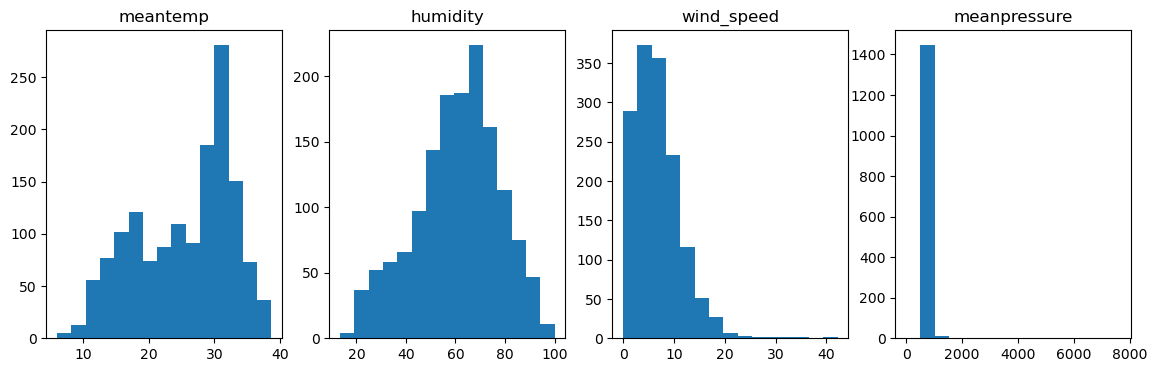

In [21]:
columns=['meantemp','humidity','wind_speed','meanpressure']
vizuelizacija(data,columns,True)

In [23]:
#nikoj od numerickite koloni nema normalna raspredelba

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [29]:
#sortirame spored date kolonata
data = data.sort_values('date')
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [31]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [35]:
data['date'] = pd.to_datetime(data['date'])

In [37]:
#dodavame datumi vo slucaj da falat 
def fill_dates(data):
    data_copy = data.copy()
    data_copy.set_index('date',inplace=True)
    full_dates = pd.date_range(start=data_copy.index.min(),end=data_copy.index.max(),freq='D')
    data_copy = data_copy.reset_index()
    return data_copy

In [39]:
data = fill_dates(data)
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [43]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

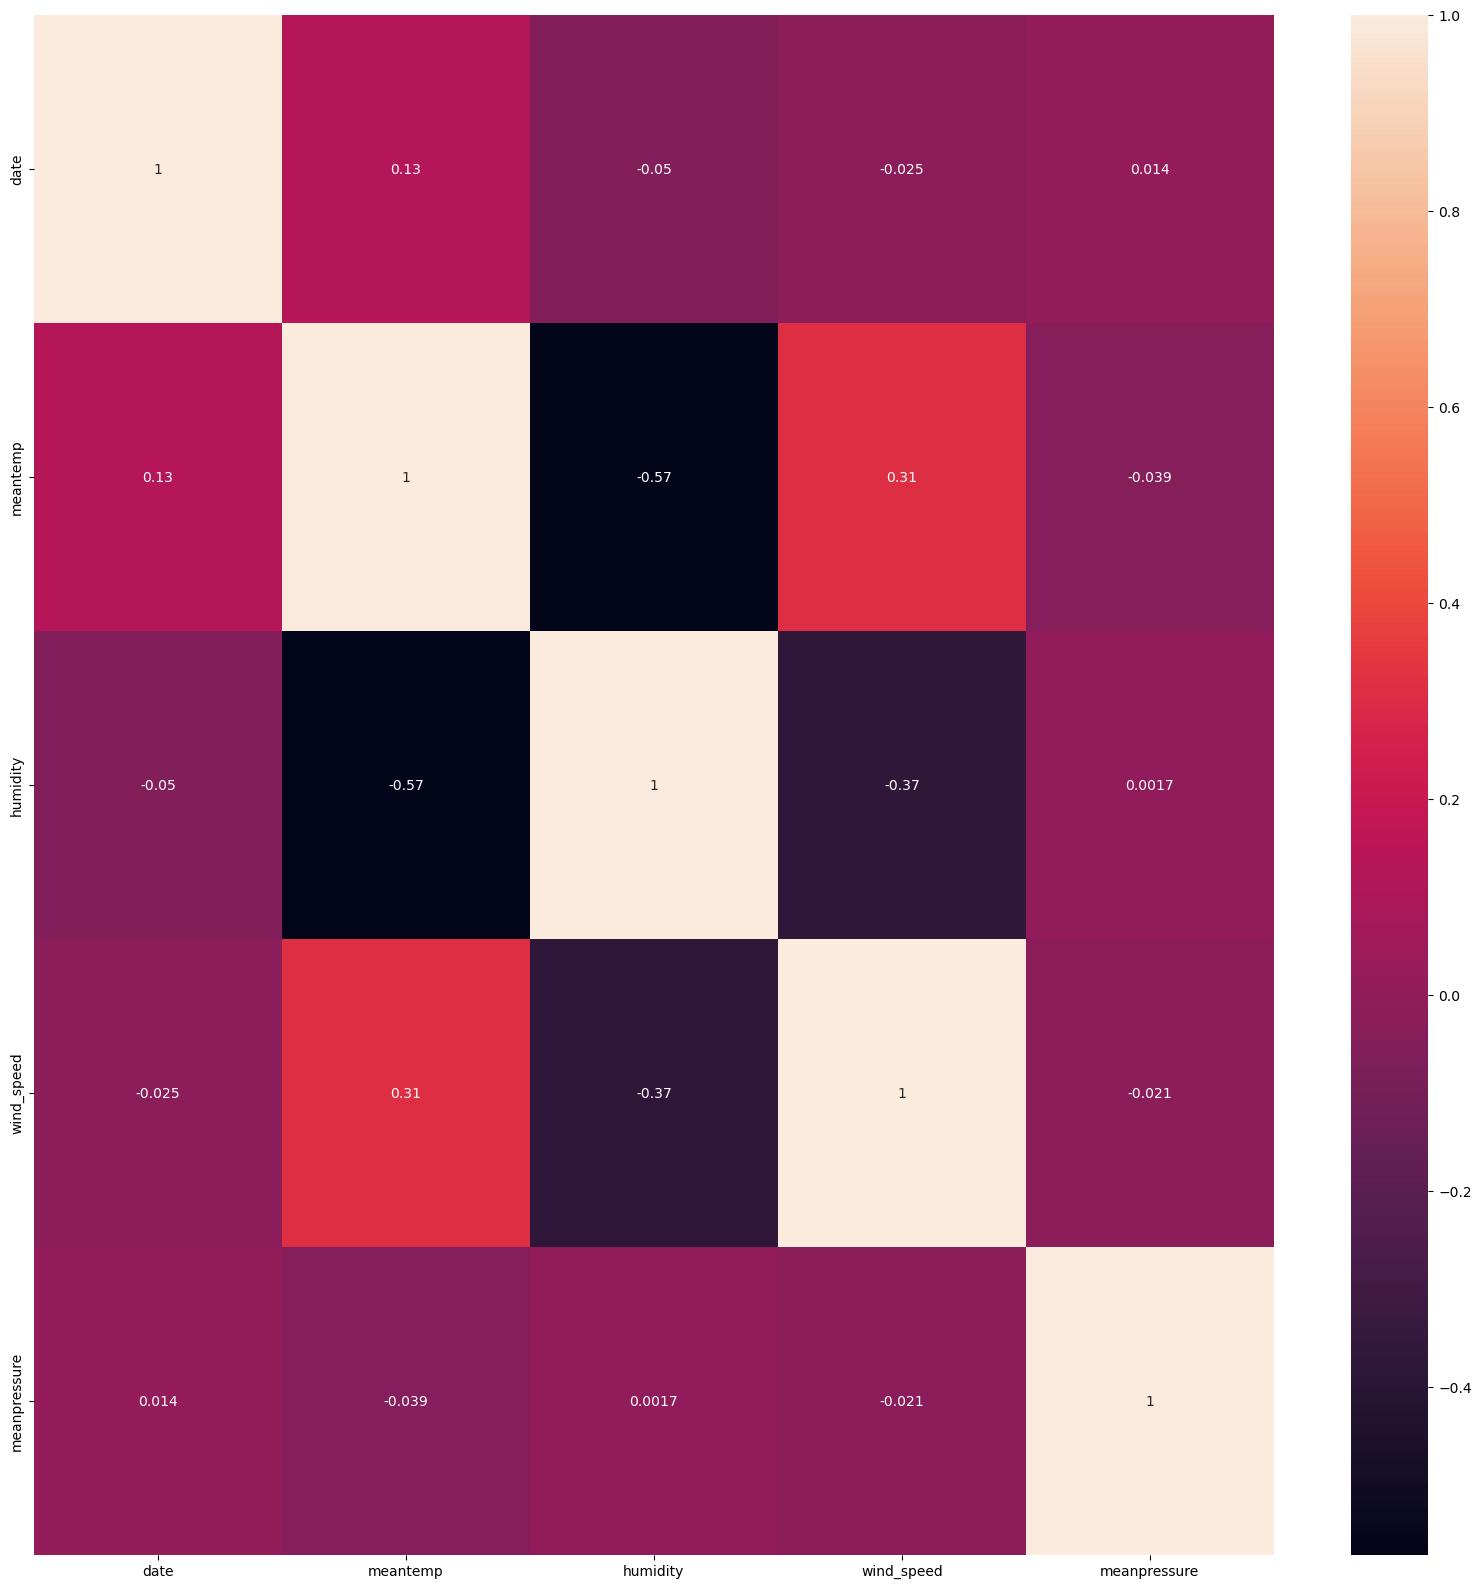

In [45]:
#kreirame heatmap da vidime korelacija na kolonite
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [47]:
#nikoja kolona ne e vo visoka korelacija so druga, nemame sto da dropneme osven date
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   int64  
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB


In [59]:
data.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,0,10.000000,84.500000,0.000000,1015.666667
1,1,7.400000,92.000000,2.980000,1017.800000
2,2,7.166667,87.000000,4.633333,1018.666667
3,3,8.666667,71.333333,1.233333,1017.166667
4,4,6.000000,86.833333,3.700000,1016.500000


In [63]:
data.drop('date',axis=1,inplace=True)

In [65]:
data.head(5)

,meantemp,humidity,wind_speed,meanpressure
0,10.000000,84.500000,0.000000,1015.666667
1,7.400000,92.000000,2.980000,1017.800000
2,7.166667,87.000000,4.633333,1018.666667
3,8.666667,71.333333,1.233333,1017.166667
4,6.000000,86.833333,3.700000,1016.500000


# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [69]:
columns_for_lags = data.columns
for feature in columns_for_lags:
    for lag in range(1,4):
        data[f'${feature}_lag_{lag}']=data[feature].shift()

In [71]:
data=data.dropna()
data.head(5)

,meantemp,humidity,wind_speed,meanpressure,$meantemp_lag_1,$meantemp_lag_2,$meantemp_lag_3,$humidity_lag_1,$humidity_lag_2,$humidity_lag_3,$wind_speed_lag_1,$wind_speed_lag_2,$wind_speed_lag_3,$meanpressure_lag_1,$meanpressure_lag_2,$meanpressure_lag_3
1,7.400000,92.000000,2.980000,1017.800000,10.000000,10.000000,10.000000,84.500000,84.500000,84.500000,0.000000,0.000000,0.000000,1015.666667,1015.666667,1015.666667
2,7.166667,87.000000,4.633333,1018.666667,7.400000,7.400000,7.400000,92.000000,92.000000,92.000000,2.980000,2.980000,2.980000,1017.800000,1017.800000,1017.800000
3,8.666667,71.333333,1.233333,1017.166667,7.166667,7.166667,7.166667,87.000000,87.000000,87.000000,4.633333,4.633333,4.633333,1018.666667,1018.666667,1018.666667
4,6.000000,86.833333,3.700000,1016.500000,8.666667,8.666667,8.666667,71.333333,71.333333,71.333333,1.233333,1.233333,1.233333,1017.166667,1017.166667,1017.166667
5,7.000000,82.800000,1.480000,1018.000000,6.000000,6.000000,6.000000,86.833333,86.833333,86.833333,3.700000,3.700000,3.700000,1016.500000,1016.500000,1016.500000


In [73]:
data.isnull().sum()

meantemp               0
humidity               0
wind_speed             0
meanpressure           0
$meantemp_lag_1        0
$meantemp_lag_2        0
$meantemp_lag_3        0
$humidity_lag_1        0
$humidity_lag_2        0
$humidity_lag_3        0
$wind_speed_lag_1      0
$wind_speed_lag_2      0
$wind_speed_lag_3      0
$meanpressure_lag_1    0
$meanpressure_lag_2    0
$meanpressure_lag_3    0
dtype: int64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [77]:
from sklearn.model_selection import train_test_split
data_new = data.drop('meantemp',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['meantemp'],test_size=0.2,shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [79]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

Use the trained model to make predictions for the test set.

In [81]:
model.fit(X_train,Y_train)
preds = model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [85]:
from sklearn.metrics import r2_score
print("R2_score: ",r2_score(Y_test,preds))

R2_score:  0.9342099918887204


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [89]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Use the trained model to make predictions for the test set.

In [91]:
xgb_preds = xgb_model.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [93]:
from sklearn.metrics import r2_score
print("R2_score: ",r2_score(Y_test,xgb_preds))

R2_score:  0.9278137267510513


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [95]:
from sklearn.model_selection import train_test_split
data_new = data.drop('meantemp',axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(data_new,data['meantemp'],test_size=0.1,shuffle=False)

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [101]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_grid={
    'n_estimators':[50,60,80,100],
    'max_depth':[2,6,8,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,verbose=1,n_jobs=-1,scoring='r2')
grid_search.fit(X_train,Y_train)
print("Best params: ",grid_search.best_params_)
print("Best score: ",grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


C:\Users\HP\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 60}
Best score:  0.952954598892634


## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
best_model=grid_search.best_estimator_
best_model.fit(X_train,Y_train)
best_preds = best_model.pr